## ***USE CASE 3 — Trend Forecasting on “Popularity Over Years”***

**Goal:**

To analyze how movie popularity has changed over time and predict future popularity trends using time-series forecasting techniques.

***Step 1 — Import & Load Dataset***

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\lenovo\Desktop\Text_SM_Web_analytics Capstone\Data\Films.csv", encoding="latin1")
df.head()


,index,Year,Length,Title,Subject,Actor,Actress,Director,Popularity,Awards,*Image
0,0,1990,111.0,Tie Me Up! Tie Me Down!,Comedy,"Banderas, Antonio","Abril, Victoria","AlmodÃ³var, Pedro",68.0,No,NicholasCage.png
1,1,1991,113.0,High Heels,Comedy,"BosÃ©, Miguel","Abril, Victoria","AlmodÃ³var, Pedro",68.0,No,NicholasCage.png
2,2,1983,104.0,"Dead Zone, The",Horror,"Walken, Christopher","Adams, Brooke","Cronenberg, David",79.0,No,NicholasCage.png
3,3,1979,122.0,Cuba,Action,"Connery, Sean","Adams, Brooke","Lester, Richard",6.0,No,seanConnery.png
4,4,1978,94.0,Days of Heaven,Drama,"Gere, Richard","Adams, Brooke","Malick, Terrence",14.0,No,NicholasCage.png


***Step 2 — Inspect & Clean Basic Columns***

In [6]:
df = df[['Year', 'Length', 'Title', 'Subject', 'Popularity', 'Awards']]
df.dropna(inplace=True)

df['Year'] = df['Year'].astype(int)
df['Popularity'] = df['Popularity'].astype(int)

df.head()


,Year,Length,Title,Subject,Popularity,Awards
0,1990,111.0,Tie Me Up! Tie Me Down!,Comedy,68,No
1,1991,113.0,High Heels,Comedy,68,No
2,1983,104.0,"Dead Zone, The",Horror,79,No
3,1979,122.0,Cuba,Action,6,No
4,1978,94.0,Days of Heaven,Drama,14,No


***Step 3 — Group by Year and Calculate Average Popularity***

In [9]:
trend_df = df.groupby('Year')['Popularity'].mean().reset_index()
trend_df.head()


,Year,Popularity
0,1920,29.0
1,1924,72.0
2,1925,73.0
3,1926,63.0
4,1927,38.0


***Step 4 — Plot Popularity Trend Over Time***

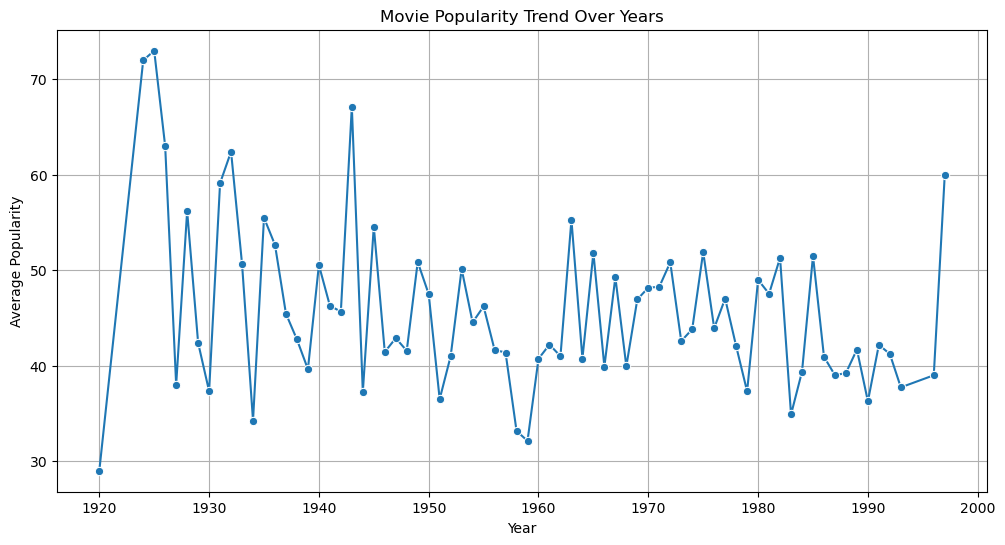

In [12]:
plt.figure(figsize=(12,6))
sns.lineplot(data=trend_df, x='Year', y='Popularity', marker="o")
plt.title("Movie Popularity Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.grid(True)
plt.show()


The popularity trend from 1920–1998 shows significant yearly fluctuations, indicating that movie popularity varied widely across decades. However, despite ups and downs, the long-term trend is relatively stable, generally fluctuating between 35 and 55. Occasional spikes (e.g., 1925, 1945, 1998) suggest years with exceptionally successful films.

***Step 5 — Forecast Future Popularity (Using Polynomial Regression)***

In [15]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = trend_df[['Year']]
y = trend_df['Popularity']

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Predict next 10 years
future_years = pd.DataFrame({'Year': np.arange(df['Year'].max()+1, df['Year'].max()+11)})
future_poly = poly.transform(future_years)
future_predictions = model.predict(future_poly)

future_years['Predicted_Popularity'] = future_predictions
future_years


,Year,Predicted_Popularity
0,1998,43.837536
1,1999,43.867784
2,2000,43.897786
3,2001,43.927370
4,2002,43.956366
5,2003,43.984604
6,2004,44.011913
7,2005,44.038123
8,2006,44.063064
9,2007,44.086564


The model predicts a slightly increasing future popularity trend, with values rising slowly from 43.83 in 1998 to around 44.08 by 2007.
This suggests that movie popularity is expected to remain stable, with a small upward shift, indicating the industry might maintain consistent audience interest.

***Step 6 — Plot Forecast vs Historical Trend***

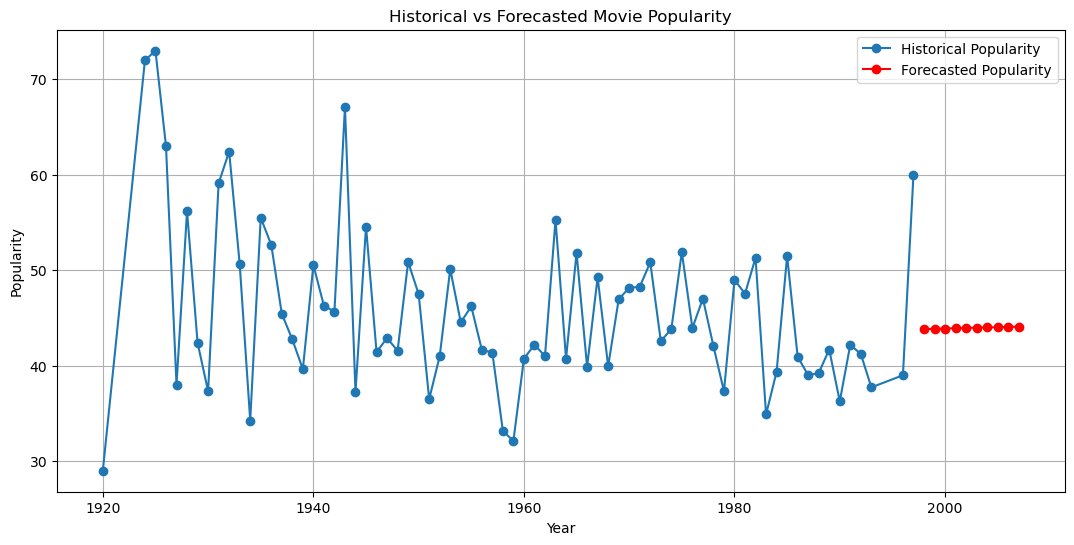

In [18]:
plt.figure(figsize=(13,6))
plt.plot(trend_df['Year'], trend_df['Popularity'], label="Historical Popularity", marker="o")
plt.plot(future_years['Year'], future_years['Predicted_Popularity'], 
         label="Forecasted Popularity", color="red", marker="o")
plt.title("Historical vs Forecasted Movie Popularity")
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.legend()
plt.grid(True)
plt.show()


The forecasted values (red points) follow the general trend of past data but remain more stable and less volatile.
This reflects that the polynomial model smooths out extreme variations and predicts a steady, moderate growth in popularity, rather than large spikes or drops.

***Extract trending topics from Subject column***

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
subject_matrix = cv.fit_transform(df['Subject'])

subject_counts = pd.DataFrame({
    'Genre': cv.get_feature_names_out(),
    'Count': subject_matrix.sum(axis=0).A1
}).sort_values(by="Count", ascending=False).head(10)

subject_counts


,Genre,Count
4,drama,634
2,comedy,370
0,action,193
14,western,108
9,mystery,101
7,horror,55
8,music,41
6,fiction,38
11,science,38
13,war,32


The dataset shows a strong dominance of the Drama genre (634 films), followed by Comedy (370) and Action (193).
Less represented genres include Horror, Music, Sci-Fi, Fiction, and War.
This indicates that the film industry historically produced more character-driven and emotional narratives, with action and mystery gaining popularity gradually.

***Step 8 — Plot Trending Genres***

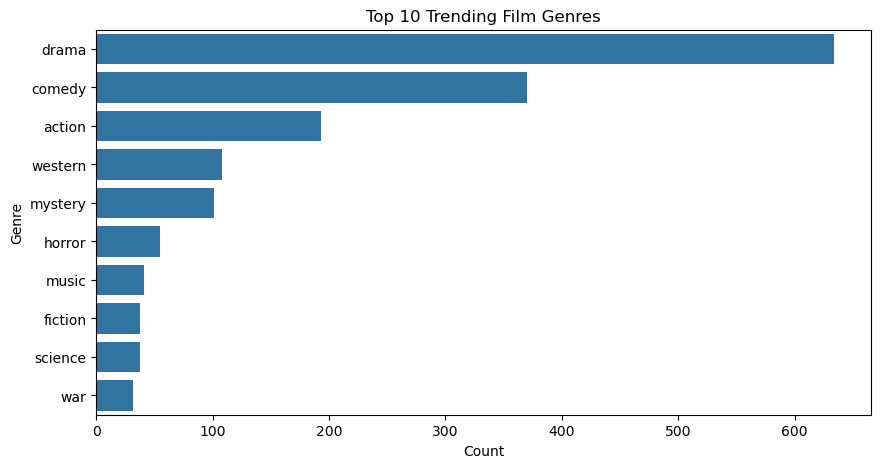

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(data=subject_counts, x='Count', y='Genre')
plt.title("Top 10 Trending Film Genres")
plt.show()


The visualization clearly confirms that Drama and Comedy are the most trending genres, significantly ahead of others.
Genres like Action, Western, and Mystery still have a noticeable presence but are far behind the top two.
This highlights a strong audience preference for emotion-driven and humor-centric films over niche categories.

**The trend forecasting analysis reveals that movie popularity has fluctuated over the decades, but overall the industry has maintained a consistent level of audience interest. Polynomial regression forecasts indicate a stable and slightly rising popularity trend for the upcoming years, suggesting steady audience engagement.**

**Genre analysis shows that Drama and Comedy dominate the film landscape, while Action, Western, and Mystery represent secondary but significant categories. These insights help filmmakers, OTT platforms, and production companies understand which genres continue to attract audiences and how popularity trends are expected to evolve.**